# Coursera capstone project

## Import dependencies.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json # library to handle JSON files
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
import folium
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
import folium # plotting library
from geopy.geocoders import Nominatim
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

## DATA

### Different areas of Antwerp city
We look to areas inside the so-called 'singel of antwerp'. This a is traffic dense road in which the city is encapsulated.


In [2]:
address = 'Antwerp city, belgium'
geolocator = Nominatim(user_agent="Antwerp_explorer")
location_antwerp = geolocator.geocode(address)
latitude_antwerp = location_antwerp.latitude
longitude_antwerp = location_antwerp.longitude
print('The geograpical coordinate of Antwerp are {}, {}.'.format(latitude_antwerp, longitude_antwerp))

The geograpical coordinate of Antwerp are 51.2211097, 4.3997081.


### Create a map of Antwerp.

In [3]:
# create map of Toronto using latitude and longitude values
map_antwerp = folium.Map(location=[latitude_antwerp, longitude_antwerp], zoom_start=13)
folium.CircleMarker(
        [latitude_antwerp, longitude_antwerp],
        radius=10,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_antwerp) 
map_antwerp

### setup the dataframe

In [4]:
# define the dataframe columns
column_names = ['Area', 'Latitude', 'Longitude'] 
# instantiate the dataframe
df = pd.DataFrame(columns=column_names)
df.head()

,Area,Latitude,Longitude


### fill up the dataframe


In [5]:
df_area = pd.read_excel("C:/Users/tomah/Desktop/projects/Coursera_Capstone/Antwerp_areas.xlsx")
df_area
for area in df_area['Area']:
    print(area)

Schipperskwartier
Seefhoek 
Park Spoor Noord
Sint-Andries
Zuid
Markgrave 
Harmonie
Oud-Berchem
Zurenborg
Diamant
Eilandje
Groen Kwartier
De Roma
Stadspark
Het steen 
Meir
Koninklijk museum voor schone kunsten


In [6]:
geolocator = Nominatim(user_agent="Antwerpen_explorer")
for area in df_area['Area']:
    address =  area+ ' Antwerpen'
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    else: 
        print('Area ',area, ' not found')
    
    df = df.append({'Area': area, 'Latitude': latitude, 'Longitude': longitude}, ignore_index = True)


In [7]:
df

,Area,Latitude,Longitude
0,Schipperskwartier,51.225922,4.404064
1,Seefhoek,51.224537,4.427330
2,Park Spoor Noord,51.230088,4.423472
3,Sint-Andries,51.216174,4.398647
4,Zuid,51.199941,4.390926
5,Markgrave,51.198577,4.403973
6,Harmonie,51.202394,4.408989
7,Oud-Berchem,51.197837,4.425220
8,Zurenborg,51.206853,4.430287
9,Diamant,51.215858,4.420503


In [8]:
for area, lat, lng in zip(df['Area'], df['Latitude'], df['Longitude']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_antwerp)    
map_antwerp

### Define some parameters for the API request


In [9]:
CLIENT_ID = '0RUU1BWVXOUZU3QNIID2LTKQNMTXN1JZMS4LOPCXUOP3JP1T' # your Foursquare ID
CLIENT_SECRET = 'ZCXONVLPGG3NNJJKNQBRGSZNDFAT2JBWENR4N3HAG2CUU0OF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 500

### Define a method for getting data about venues 

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Get Antwerp venues

In [11]:
Antwerp_venues = getNearbyVenues(names=df['Area'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],radius = 700
                                  )

Schipperskwartier
Seefhoek 
Park Spoor Noord
Sint-Andries
Zuid
Markgrave 
Harmonie
Oud-Berchem
Zurenborg
Diamant
Eilandje
Groen Kwartier
De Roma
Stadspark
Het steen 
Meir
Koninklijk museum voor schone kunsten


### Visualize shape and content of data

In [12]:
Antwerp_venues.head()

,Area,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Schipperskwartier,51.225922,4.404064,Pazzo,51.226926,4.406348,Italian Restaurant
1,Schipperskwartier,51.225922,4.404064,Otomat,51.227354,4.405326,Pizza Place
2,Schipperskwartier,51.225922,4.404064,Koffieklap,51.224382,4.404372,Coffee Shop
3,Schipperskwartier,51.225922,4.404064,Napo's,51.227994,4.404777,Restaurant
4,Schipperskwartier,51.225922,4.404064,MóN,51.227805,4.403613,Spanish Restaurant


### Group by area and count venues

In [13]:
Antwerp_venues.groupby('Area').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
De Roma,44,44,44,44,44,44
Diamant,100,100,100,100,100,100
Eilandje,100,100,100,100,100,100
Groen Kwartier,100,100,100,100,100,100
Harmonie,69,69,69,69,69,69
Het steen,100,100,100,100,100,100
Koninklijk museum voor schone kunsten,100,100,100,100,100,100
Markgrave,52,52,52,52,52,52
Meir,100,100,100,100,100,100


### Use one hot encoding and move Area to front


In [14]:
# one hot encoding
Antwerp_onehot = pd.get_dummies(Antwerp_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Antwerp_onehot['Area'] = Antwerp_venues['Area'] 
cols = Antwerp_onehot.columns.tolist()
cols

# move column name to the beginning 
cols.insert(0, cols.pop(cols.index('Area')))
cols

Antwerp_onehot =  Antwerp_onehot.reindex(columns= cols)

Antwerp_onehot.head()

,Area,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Schipperskwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Schipperskwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Schipperskwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Schipperskwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Schipperskwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category¶


In [15]:
Antwerp_grouped = Antwerp_onehot.groupby('Area').mean().reset_index()
Antwerp_grouped

,Area,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,De Roma,0.00,0.022727,0.00,0.00,0.000000,0.00,0.022727,0.00,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
1,Diamant,0.00,0.000000,0.00,0.01,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.01,0.07
2,Eilandje,0.00,0.000000,0.00,0.00,0.000000,0.00,0.010000,0.01,0.00,...,0.000000,0.00,0.000000,0.00,0.020000,0.000000,0.00,0.00,0.00,0.00
3,Groen Kwartier,0.00,0.000000,0.00,0.00,0.010000,0.00,0.010000,0.00,0.00,...,0.010000,0.00,0.000000,0.00,0.010000,0.000000,0.00,0.00,0.00,0.00
4,Harmonie,0.00,0.000000,0.00,0.00,0.014493,0.00,0.014493,0.00,0.00,...,0.014493,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
5,Het steen,0.00,0.000000,0.00,0.00,0.000000,0.01,0.000000,0.01,0.00,...,0.000000,0.03,0.010000,0.01,0.010000,0.000000,0.00,0.00,0.00,0.00
6,Koninklijk museum voor schone kunsten,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.02,0.01,...,0.000000,0.00,0.010000,0.00,0.020000,0.010000,0.00,0.00,0.00,0.00
7,Markgrave,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
8,Meir,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.01,0.00,...,0.000000,0.01,0.000000,0.00,0.000000,0.000000,0.02,0.00,0.00,0.00
9,Oud-Berchem,0.00,0.000000,0.00,0.00,0.000000,0.00,0.012195,0.00,0.00,...,0.012195,0.00,0.000000,0.00,0.012195,0.000000,0.00,0.00,0.00,0.00


### Define Function to sort venues in descending order


In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Create the new dataframe and display the top 10 venues for each neighborhood.


In [17]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Area_venues_sorted = pd.DataFrame(columns=columns)
Area_venues_sorted['Area'] = Antwerp_grouped['Area']

for ind in np.arange(Antwerp_grouped.shape[0]):
    Area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Antwerp_grouped.iloc[ind, :], num_top_venues)


Area_venues_sorted_4_clusters = Area_venues_sorted
Area_venues_sorted.head()
Area_venues_sorted_4_clusters.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,De Roma,Bar,Hostel,Hotel,Seafood Restaurant,Nightclub,Coffee Shop,Sandwich Place,Stadium,Breakfast Spot,Science Museum
1,Diamant,Zoo Exhibit,Coffee Shop,Thai Restaurant,Clothing Store,Hotel,Italian Restaurant,Asian Restaurant,Sandwich Place,Chinese Restaurant,Beer Bar
2,Eilandje,Bar,Restaurant,Nightclub,Italian Restaurant,Coffee Shop,Beach Bar,Spanish Restaurant,French Restaurant,Seafood Restaurant,Sandwich Place
3,Groen Kwartier,Bar,Bakery,Friterie,Restaurant,Coffee Shop,Supermarket,Mediterranean Restaurant,Convenience Store,Pizza Place,Cocktail Bar
4,Harmonie,Bar,Coffee Shop,Italian Restaurant,Sandwich Place,Restaurant,Friterie,Bike Rental / Bike Share,Supermarket,Park,Bakery


## Cluster Areas

### Determine amount of clusters

First we will try to determine the optimal amount of clusters in the data set. This is a fundamental issue in partitioning clustering. The determination of the optimal amount is somewhat subjective. 

We will use the elbow method to try to check if we can determine an amount that is somewhat optimal. 
In the elbow methode one should choose the amount of clusters such that adding another cluster does not result in much better 
minimization of intra-cluster variation or interia.

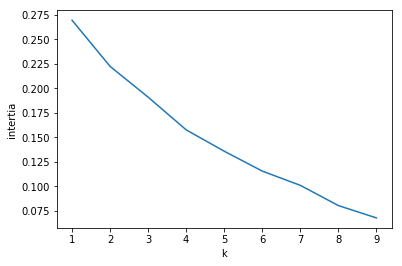

In [18]:
Antwerp_grouped_clustering = Antwerp_grouped.drop('Area', 1)
k_list = list()
intertia_list = list()
for k in range (1,10): 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Antwerp_grouped_clustering)
    inertia = kmeans.inertia_
    k_list.append(k)
    intertia_list.append(inertia)
import matplotlib.pyplot as plt
plt.plot(k_list, intertia_list)
plt.ylabel('intertia')
plt.xlabel('k')
plt.show()

We can see that the either 2 or 4 clusters give a somewhat significant improvement in minimization of inertia.
Let's try both clusters to check if we can see if either 2 or 4 clusters make more sense.

### Check with 2 clusters

Run Kmeans algorithm

In [19]:
# set number of clusters
kclusters = 2
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Antwerp_grouped_clustering)

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [20]:
# add clustering labels
Area_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Antwerp_merged = df
# merge Antwerp_grouped with Antwerp_data to add latitude/longitude for each neighborhood
Antwerp_merged = Antwerp_merged.join(Area_venues_sorted.set_index('Area'), on='Area')
Antwerp_merged = Antwerp_merged.dropna() # drop rows that contain "NA".
Antwerp_merged.head() # check the last columns!

,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Schipperskwartier,51.225922,4.404064,1,Coffee Shop,Bar,Restaurant,Italian Restaurant,French Restaurant,Cocktail Bar,Plaza,Ice Cream Shop,Gay Bar,Soup Place
1,Seefhoek,51.224537,4.427330,0,Supermarket,Steakhouse,Chinese Restaurant,Café,Bar,Friterie,Asian Restaurant,Clothing Store,Coffee Shop,Seafood Restaurant
2,Park Spoor Noord,51.230088,4.423472,0,Sandwich Place,Gay Bar,Bar,Plaza,Steakhouse,Restaurant,Breakfast Spot,French Restaurant,Athletics & Sports,Supermarket
3,Sint-Andries,51.216174,4.398647,1,Bar,Clothing Store,Coffee Shop,Spanish Restaurant,Cosmetics Shop,Bakery,Vegetarian / Vegan Restaurant,Italian Restaurant,Boutique,Cocktail Bar
4,Zuid,51.199941,4.390926,0,Bar,Coffee Shop,Snack Place,Supermarket,Bike Rental / Bike Share,Bakery,Pizza Place,Music Venue,Italian Restaurant,Restaurant


In [21]:
Area_venues_sorted_4_clusters.head()

,Cluster Labels,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,De Roma,Bar,Hostel,Hotel,Seafood Restaurant,Nightclub,Coffee Shop,Sandwich Place,Stadium,Breakfast Spot,Science Museum
1,1,Diamant,Zoo Exhibit,Coffee Shop,Thai Restaurant,Clothing Store,Hotel,Italian Restaurant,Asian Restaurant,Sandwich Place,Chinese Restaurant,Beer Bar
2,1,Eilandje,Bar,Restaurant,Nightclub,Italian Restaurant,Coffee Shop,Beach Bar,Spanish Restaurant,French Restaurant,Seafood Restaurant,Sandwich Place
3,0,Groen Kwartier,Bar,Bakery,Friterie,Restaurant,Coffee Shop,Supermarket,Mediterranean Restaurant,Convenience Store,Pizza Place,Cocktail Bar
4,0,Harmonie,Bar,Coffee Shop,Italian Restaurant,Sandwich Place,Restaurant,Friterie,Bike Rental / Bike Share,Supermarket,Park,Bakery


In [22]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Antwerp_merged['Latitude'],Antwerp_merged['Longitude'], Antwerp_merged['Area'], Antwerp_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Let's analyze  the 2 clusters

#### Cluster 1

In [23]:
Antwerp_merged.loc[Antwerp_merged['Cluster Labels'] == 0, Antwerp_merged.columns[[0] + list(range(4, Antwerp_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Seefhoek,Supermarket,Steakhouse,Chinese Restaurant,Café,Bar,Friterie,Asian Restaurant,Clothing Store,Coffee Shop,Seafood Restaurant
2,Park Spoor Noord,Sandwich Place,Gay Bar,Bar,Plaza,Steakhouse,Restaurant,Breakfast Spot,French Restaurant,Athletics & Sports,Supermarket
4,Zuid,Bar,Coffee Shop,Snack Place,Supermarket,Bike Rental / Bike Share,Bakery,Pizza Place,Music Venue,Italian Restaurant,Restaurant
5,Markgrave,Sandwich Place,Restaurant,Bakery,Italian Restaurant,Coffee Shop,Supermarket,Belgian Restaurant,Theater,Bar,Park
6,Harmonie,Bar,Coffee Shop,Italian Restaurant,Sandwich Place,Restaurant,Friterie,Bike Rental / Bike Share,Supermarket,Park,Bakery
7,Oud-Berchem,Bar,Bakery,Friterie,Restaurant,Supermarket,Coffee Shop,Gastropub,Sandwich Place,Beer Bar,Platform
8,Zurenborg,Bar,Bakery,Restaurant,Bistro,Pizza Place,Indian Restaurant,Italian Restaurant,Pub,Plaza,Cocktail Bar
11,Groen Kwartier,Bar,Bakery,Friterie,Restaurant,Coffee Shop,Supermarket,Mediterranean Restaurant,Convenience Store,Pizza Place,Cocktail Bar
12,De Roma,Bar,Hostel,Hotel,Seafood Restaurant,Nightclub,Coffee Shop,Sandwich Place,Stadium,Breakfast Spot,Science Museum


#### Cluster 2

In [24]:
Antwerp_merged.loc[Antwerp_merged['Cluster Labels'] == 1, Antwerp_merged.columns[[0] + list(range(4, Antwerp_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Schipperskwartier,Coffee Shop,Bar,Restaurant,Italian Restaurant,French Restaurant,Cocktail Bar,Plaza,Ice Cream Shop,Gay Bar,Soup Place
3,Sint-Andries,Bar,Clothing Store,Coffee Shop,Spanish Restaurant,Cosmetics Shop,Bakery,Vegetarian / Vegan Restaurant,Italian Restaurant,Boutique,Cocktail Bar
9,Diamant,Zoo Exhibit,Coffee Shop,Thai Restaurant,Clothing Store,Hotel,Italian Restaurant,Asian Restaurant,Sandwich Place,Chinese Restaurant,Beer Bar
10,Eilandje,Bar,Restaurant,Nightclub,Italian Restaurant,Coffee Shop,Beach Bar,Spanish Restaurant,French Restaurant,Seafood Restaurant,Sandwich Place
13,Stadspark,Coffee Shop,Theater,Gastropub,Clothing Store,Italian Restaurant,Bar,Burger Joint,Hotel,Zoo Exhibit,Pub
14,Het steen,Coffee Shop,Cocktail Bar,Bar,Restaurant,Italian Restaurant,Plaza,Belgian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Fish & Chips Shop
15,Meir,Clothing Store,Bar,Coffee Shop,Cocktail Bar,Boutique,Juice Bar,Cosmetics Shop,Gastropub,Bookstore,Bakery
16,Koninklijk museum voor schone kunsten,Coffee Shop,French Restaurant,Bar,Italian Restaurant,Breakfast Spot,Cocktail Bar,Japanese Restaurant,Asian Restaurant,Restaurant,Sushi Restaurant


### Discussion 2 clusters

It is not surprising that using 2 clusters, clustering the neighborhoods in Antwerp result in these two clusters.
Since I am a resident of this city i can use my "domain knowledge" here. 
The second cluster (purple) is the most touristy part of the city there are the most diverse venues: zoo, coffe shop, cocktail bars, restaurants, shops, hotels.
The first cluster is a more residential part of the city. The diversification is much less than the other cluster. 
What stands out of the data is the large amount of bakers and bars. 


### Let's try 4 clusters

In [25]:
# set number of clusters
kclusters = 4
kmeans_2 = KMeans(n_clusters=kclusters, random_state=0).fit(Antwerp_grouped_clustering)

In [26]:
try:
    del Area_venues_sorted_4_clusters['Cluster Labels']
except: 
  print("nog geen cluster labels aanwezig")

Area_venues_sorted_4_clusters.insert(0, 'Cluster Labels', kmeans_2.labels_)

In [27]:
# add clustering labels
Antwerp_merged_4_clusters = df
# merge Antwerp_grouped with Antwerp_data to add latitude/longitude for each neighborhood
Antwerp_merged_4_clusters = Antwerp_merged_4_clusters.join(Area_venues_sorted_4_clusters.set_index('Area'), on='Area')
Antwerp_merged_4_clusters = Antwerp_merged_4_clusters.dropna() # drop rows that contain "NA".
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Antwerp_merged_4_clusters['Latitude'],Antwerp_merged_4_clusters['Longitude'], Antwerp_merged_4_clusters['Area'], Antwerp_merged_4_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### let's analyze the 4 clusters

In [28]:
Antwerp_merged_4_clusters.loc[Antwerp_merged_4_clusters['Cluster Labels'] == 0, Antwerp_merged_4_clusters.columns[[0] + list(range(3, Antwerp_merged_4_clusters.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Sint-Andries,0,Bar,Clothing Store,Coffee Shop,Spanish Restaurant,Cosmetics Shop,Bakery,Vegetarian / Vegan Restaurant,Italian Restaurant,Boutique,Cocktail Bar
9,Diamant,0,Zoo Exhibit,Coffee Shop,Thai Restaurant,Clothing Store,Hotel,Italian Restaurant,Asian Restaurant,Sandwich Place,Chinese Restaurant,Beer Bar
13,Stadspark,0,Coffee Shop,Theater,Gastropub,Clothing Store,Italian Restaurant,Bar,Burger Joint,Hotel,Zoo Exhibit,Pub
15,Meir,0,Clothing Store,Bar,Coffee Shop,Cocktail Bar,Boutique,Juice Bar,Cosmetics Shop,Gastropub,Bookstore,Bakery


In [29]:
Antwerp_merged_4_clusters.loc[Antwerp_merged_4_clusters['Cluster Labels'] == 1, Antwerp_merged_4_clusters.columns[[0] + list(range(3, Antwerp_merged_4_clusters.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Schipperskwartier,1,Coffee Shop,Bar,Restaurant,Italian Restaurant,French Restaurant,Cocktail Bar,Plaza,Ice Cream Shop,Gay Bar,Soup Place
10,Eilandje,1,Bar,Restaurant,Nightclub,Italian Restaurant,Coffee Shop,Beach Bar,Spanish Restaurant,French Restaurant,Seafood Restaurant,Sandwich Place
14,Het steen,1,Coffee Shop,Cocktail Bar,Bar,Restaurant,Italian Restaurant,Plaza,Belgian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Fish & Chips Shop
16,Koninklijk museum voor schone kunsten,1,Coffee Shop,French Restaurant,Bar,Italian Restaurant,Breakfast Spot,Cocktail Bar,Japanese Restaurant,Asian Restaurant,Restaurant,Sushi Restaurant


In [30]:
Antwerp_merged_4_clusters.loc[Antwerp_merged_4_clusters['Cluster Labels'] == 2, Antwerp_merged_4_clusters.columns[[0] + list(range(3, Antwerp_merged_4_clusters.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Zuid,2,Bar,Coffee Shop,Snack Place,Supermarket,Bike Rental / Bike Share,Bakery,Pizza Place,Music Venue,Italian Restaurant,Restaurant
5,Markgrave,2,Sandwich Place,Restaurant,Bakery,Italian Restaurant,Coffee Shop,Supermarket,Belgian Restaurant,Theater,Bar,Park
6,Harmonie,2,Bar,Coffee Shop,Italian Restaurant,Sandwich Place,Restaurant,Friterie,Bike Rental / Bike Share,Supermarket,Park,Bakery
7,Oud-Berchem,2,Bar,Bakery,Friterie,Restaurant,Supermarket,Coffee Shop,Gastropub,Sandwich Place,Beer Bar,Platform
8,Zurenborg,2,Bar,Bakery,Restaurant,Bistro,Pizza Place,Indian Restaurant,Italian Restaurant,Pub,Plaza,Cocktail Bar
11,Groen Kwartier,2,Bar,Bakery,Friterie,Restaurant,Coffee Shop,Supermarket,Mediterranean Restaurant,Convenience Store,Pizza Place,Cocktail Bar
12,De Roma,2,Bar,Hostel,Hotel,Seafood Restaurant,Nightclub,Coffee Shop,Sandwich Place,Stadium,Breakfast Spot,Science Museum


In [31]:
Antwerp_merged_4_clusters.loc[Antwerp_merged_4_clusters['Cluster Labels'] == 3, Antwerp_merged_4_clusters.columns[[0] + list(range(3, Antwerp_merged_4_clusters.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Seefhoek,3,Supermarket,Steakhouse,Chinese Restaurant,Café,Bar,Friterie,Asian Restaurant,Clothing Store,Coffee Shop,Seafood Restaurant
2,Park Spoor Noord,3,Sandwich Place,Gay Bar,Bar,Plaza,Steakhouse,Restaurant,Breakfast Spot,French Restaurant,Athletics & Sports,Supermarket


### Discussion 4 clusters

It is very interesting to see that if we increase the amount of clusters from 2 to 4 clusters we just get a subdivision of the first two clusters.
The cluster of the more touristy part of the city gets split in clusters 1 (red) and 2 (purple). 
The red clusters seems to be the area that is most suited for shopping. 
For the less touristy clusters it is harder to determine the meaning of the subdivision. 
Although it is clear that if you want to get a drink, you are far better of in the third cluster (blue). 


# Gent

Let's repeat the procedure we did for Antwerp for Gent. 

### Data

In [32]:
address = 'Gent, België'
geolocator = Nominatim(user_agent="Gent_explorer")
location_gent = geolocator.geocode(address)
latitude_gent = location_gent.latitude
longitude_gent = location_gent.longitude
print('The geograpical coordinate of Gent are {}, {}.'.format(latitude_gent, longitude_gent))

The geograpical coordinate of Gent are 51.0538286, 3.7250121.


In [33]:
# create map of Gent using latitude and longitude values
map_gent = folium.Map(location=[latitude_gent, longitude_gent], zoom_start=13)
folium.CircleMarker(
        [latitude_gent, longitude_gent],
        radius=10,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gent) 
map_gent

### get data from excel file

In [34]:
# define the dataframe columns
column_names = ['Area', 'Latitude', 'Longitude'] 
# instantiate the dataframe
df = pd.DataFrame(columns=column_names)
df_area = pd.read_excel("C:/Users/tomah/Desktop/projects/Coursera_Capstone/Gent_areas.xlsx")
df_area.head()
for area in df_area['Area']:
    print(area)

Waterwijk 
Het zuid
Dampoort
Dok-Noord
Rabot
Brugse Poort
Rozemarijnstraat
Kunstenkwartier
Casinoplein
Begijnengracht
Lousbergsbrug
Belfort
Academiebrug
De Bijloke
Arteveldehogeschool campus leeuwstraat
Oude Beestenmarkt
Tolhuispark


### Get location

In [35]:
#geolocator = Nominatim(user_agent="Gent_explorer")
for area in df_area['Area']:
    address =  area + ' Gent'
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    else: 
        print('Area ',area, ' not found')
    
    df = df.append({'Area': area, 'Latitude': latitude, 'Longitude': longitude}, ignore_index = True)


### Plot location on map

In [36]:
for area, lat, lng in zip(df['Area'], df['Latitude'], df['Longitude']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_gent)    
map_gent

### Get nearby venues

In [78]:
Gent_venues = getNearbyVenues(names=df['Area'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'], radius = 750
                                  )

Waterwijk 
Het zuid
Dampoort
Dok-Noord
Rabot
Brugse Poort
Rozemarijnstraat
Kunstenkwartier
Casinoplein
Begijnengracht
Lousbergsbrug
Belfort
Academiebrug
De Bijloke
Arteveldehogeschool campus leeuwstraat
Oude Beestenmarkt
Tolhuispark


### One hot encoding

In [79]:
Gent_venues.groupby('Area').count()
# one hot encoding
Gent_onehot = pd.get_dummies(Gent_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Gent_onehot['Area'] = Gent_venues['Area'] 
cols = Gent_onehot.columns.tolist()
cols

# move column name to the beginning 
cols.insert(0, cols.pop(cols.index('Area')))
cols

Gent_onehot =  Gent_onehot.reindex(columns= cols)

Gent_onehot.head()

,Area,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Waterwijk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Waterwijk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Waterwijk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Waterwijk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Waterwijk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group by area

In [80]:
Gent_grouped = Gent_onehot.groupby('Area').mean().reset_index()
Gent_grouped

,Area,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Academiebrug,0.000000,0.01,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.01,0.040000,0.010000,0.000000,0.00,0.030000,0.010000,0.000000
1,Arteveldehogeschool campus leeuwstraat,0.000000,0.00,0.000000,0.00,0.000000,0.01,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.010000,0.000000,0.01,0.000000,0.000000,0.000000
2,Begijnengracht,0.000000,0.01,0.000000,0.00,0.000000,0.00,0.020000,0.000000,0.000000,...,0.000000,0.000000,0.01,0.000000,0.010000,0.000000,0.00,0.020000,0.010000,0.010000
3,Belfort,0.000000,0.01,0.000000,0.01,0.000000,0.01,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.020000,0.000000,0.00,0.000000,0.000000,0.000000
4,Brugse Poort,0.013514,0.00,0.000000,0.00,0.013514,0.00,0.000000,0.000000,0.013514,...,0.000000,0.000000,0.00,0.054054,0.000000,0.000000,0.00,0.013514,0.000000,0.013514
5,Casinoplein,0.000000,0.01,0.000000,0.00,0.000000,0.00,0.030000,0.000000,0.000000,...,0.000000,0.000000,0.01,0.000000,0.010000,0.000000,0.00,0.000000,0.020000,0.010000
6,Dampoort,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.023810,0.011905,0.011905,0.00,0.023810,0.000000,0.000000
7,De Bijloke,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.030000,0.000000,0.00,0.010000,0.010000,0.010000
8,Dok-Noord,0.000000,0.00,0.015873,0.00,0.031746,0.00,0.015873,0.015873,0.000000,...,0.000000,0.015873,0.00,0.015873,0.015873,0.000000,0.00,0.000000,0.000000,0.000000
9,Het zuid,0.000000,0.00,0.000000,0.00,0.000000,0.03,0.030000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000


### Show top 10 venues in order

In [81]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Area_venues_sorted = pd.DataFrame(columns=columns)
Area_venues_sorted['Area'] = Gent_grouped['Area']

for ind in np.arange(Gent_grouped.shape[0]):
    Area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Gent_grouped.iloc[ind, :], num_top_venues)

Area_venues_sorted_3_clusters = Area_venues_sorted
Area_venues_sorted.head()


,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Academiebrug,Bar,Plaza,Pub,Bistro,Belgian Restaurant,Turkish Restaurant,Italian Restaurant,Tapas Restaurant,Thai Restaurant,Cocktail Bar
1,Arteveldehogeschool campus leeuwstraat,Bar,Sandwich Place,Italian Restaurant,Friterie,Burger Joint,Park,Pub,Print Shop,Supermarket,Pizza Place
2,Begijnengracht,Belgian Restaurant,Bar,Bistro,Park,Plaza,Italian Restaurant,Comfort Food Restaurant,Bakery,Coffee Shop,Pub
3,Belfort,Coffee Shop,Bistro,Plaza,Bar,Clothing Store,Hotel,Cosmetics Shop,Beer Bar,Vegetarian / Vegan Restaurant,Ice Cream Shop
4,Brugse Poort,Bakery,Doner Restaurant,Turkish Restaurant,Park,Bar,Plaza,Supermarket,Sandwich Place,Cosmetics Shop,Friterie


## Cluster Areas


### Determine amount of clusters

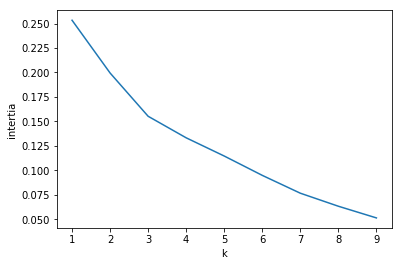

In [82]:
Gent_grouped_clustering = Gent_grouped.drop('Area', 1)
k_list = list()
intertia_list = list()
for k in range (1,10): 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Gent_grouped_clustering)
    inertia = kmeans.inertia_
    k_list.append(k)
    intertia_list.append(inertia)
import matplotlib.pyplot as plt
plt.plot(k_list, intertia_list)
plt.ylabel('intertia')
plt.xlabel('k')
plt.show()

This graphs is more clear: let's go with 3 clusters.

### Check with 3 clusters

Run Kmeans algorithm

In [83]:
# set number of clusters
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Gent_grouped_clustering)

In [85]:
try: 
    del Area_venues_sorted['Cluster Labels']
except: 
    print('no such label')
    Area_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Area_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [86]:
# add clustering labels
Gent_merged = df
# merge Antwerp_grouped with Antwerp_data to add latitude/longitude for each neighborhood
Gent_merged = Gent_merged.join(Area_venues_sorted.set_index('Area'), on='Area')
Gent_merged = Gent_merged.dropna() # drop rows that contain "NA".
Gent_merged.head() # check the last columns!

,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Waterwijk,51.059219,3.728251,1,Bar,Turkish Restaurant,Belgian Restaurant,Italian Restaurant,Bistro,Wine Bar,Tapas Restaurant,Breakfast Spot,Cocktail Bar,Plaza
1,Het zuid,51.205789,4.387357,1,Bar,Italian Restaurant,Pub,Coffee Shop,French Restaurant,Cocktail Bar,Belgian Restaurant,Japanese Restaurant,Art Museum,Asian Restaurant
2,Dampoort,51.057107,3.738640,0,Bar,Gastropub,Doner Restaurant,Bakery,Park,Coffee Shop,Dance Studio,Theater,Italian Restaurant,Bus Stop
3,Dok-Noord,51.067696,3.733026,0,Bakery,Bistro,Park,Bar,Breakfast Spot,Convenience Store,Bus Stop,Coffee Shop,Bridge,Art Gallery
4,Rabot,51.062643,3.712286,0,Bakery,Doner Restaurant,Supermarket,Turkish Restaurant,Theater,Bar,Sandwich Place,Friterie,Park,Convenience Store


In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Gent_merged['Latitude'],Gent_merged['Longitude'], Gent_merged['Area'], Gent_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Let's analyze  the 3 clusters

#### cluster 1

In [88]:
Gent_merged.loc[Gent_merged['Cluster Labels'] == 0, Gent_merged.columns[[0] + list(range(4, Gent_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Dampoort,Bar,Gastropub,Doner Restaurant,Bakery,Park,Coffee Shop,Dance Studio,Theater,Italian Restaurant,Bus Stop
3,Dok-Noord,Bakery,Bistro,Park,Bar,Breakfast Spot,Convenience Store,Bus Stop,Coffee Shop,Bridge,Art Gallery
4,Rabot,Bakery,Doner Restaurant,Supermarket,Turkish Restaurant,Theater,Bar,Sandwich Place,Friterie,Park,Convenience Store
5,Brugse Poort,Bakery,Doner Restaurant,Turkish Restaurant,Park,Bar,Plaza,Supermarket,Sandwich Place,Cosmetics Shop,Friterie
6,Rozemarijnstraat,Bar,Friterie,Bus Stop,Gym / Fitness Center,Sports Bar,Sports Club,Bakery,Basketball Court,Pet Store,Furniture / Home Store
10,Lousbergsbrug,Park,Coffee Shop,Bistro,Bakery,Pub,Italian Restaurant,Convenience Store,Vegetarian / Vegan Restaurant,Sandwich Place,Historic Site


#### cluster 2

In [89]:
Gent_merged.loc[Gent_merged['Cluster Labels'] == 1, Gent_merged.columns[[0] + list(range(4, Gent_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Waterwijk,Bar,Turkish Restaurant,Belgian Restaurant,Italian Restaurant,Bistro,Wine Bar,Tapas Restaurant,Breakfast Spot,Cocktail Bar,Plaza
1,Het zuid,Bar,Italian Restaurant,Pub,Coffee Shop,French Restaurant,Cocktail Bar,Belgian Restaurant,Japanese Restaurant,Art Museum,Asian Restaurant
8,Casinoplein,Bar,Belgian Restaurant,Coffee Shop,Italian Restaurant,Bistro,Plaza,Clothing Store,Comfort Food Restaurant,Bakery,Gym / Fitness Center
9,Begijnengracht,Belgian Restaurant,Bar,Bistro,Park,Plaza,Italian Restaurant,Comfort Food Restaurant,Bakery,Coffee Shop,Pub
11,Belfort,Coffee Shop,Bistro,Plaza,Bar,Clothing Store,Hotel,Cosmetics Shop,Beer Bar,Vegetarian / Vegan Restaurant,Ice Cream Shop
12,Academiebrug,Bar,Plaza,Pub,Bistro,Belgian Restaurant,Turkish Restaurant,Italian Restaurant,Tapas Restaurant,Thai Restaurant,Cocktail Bar
15,Oude Beestenmarkt,Bar,Coffee Shop,Wine Bar,Plaza,Park,Bistro,Men's Store,Sushi Restaurant,Beer Bar,Jewelry Store
16,Tolhuispark,Turkish Restaurant,Bar,Bistro,Belgian Restaurant,Italian Restaurant,Tapas Restaurant,Pub,Art Gallery,Coffee Shop,Bakery


#### cluster 3

In [90]:
Gent_merged.loc[Gent_merged['Cluster Labels'] == 2, Gent_merged.columns[[0] + list(range(4, Gent_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kunstenkwartier,Bar,Italian Restaurant,Pub,Breakfast Spot,Sandwich Place,Friterie,Concert Hall,Vegetarian / Vegan Restaurant,Pizza Place,Bakery
13,De Bijloke,Bar,Italian Restaurant,Pub,Friterie,Sandwich Place,Bistro,Concert Hall,Breakfast Spot,Vegetarian / Vegan Restaurant,Bookstore
14,Arteveldehogeschool campus leeuwstraat,Bar,Sandwich Place,Italian Restaurant,Friterie,Burger Joint,Park,Pub,Print Shop,Supermarket,Pizza Place


### Most common venues in Gent & Antwerp

## Gent

In [92]:
adress = 'Gent, België'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


51.2211097 4.3997081


In [93]:
def getNearbyVenuesOneCity(name, latitude, longitude, radius):
    
    venues_list=[]

    print(name)
            
        # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
         VERSION, 
        latitude, 
        longitude, 
        radius, 
        LIMIT)
            
     # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
    # return only relevant information for each nearby venue
    venues_list.append([(
        name, 
        latitude, 
        longitude, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [94]:
geolocator = Nominatim(user_agent="Gent_explorer")
address =  'Gent'
location = geolocator.geocode(address)
Gent_all_venues = getNearbyVenuesOneCity(name= 'Gent',
                                   latitude=latitude,
                                   longitude=longitude, radius = 2000)
Gent_all_venues.head()

Gent


,Area,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gent,51.22111,4.399708,Zaowang,51.220292,4.399674,Sushi Restaurant
1,Gent,51.22111,4.399708,Bia Mara,51.220894,4.400189,Fish & Chips Shop
2,Gent,51.22111,4.399708,Grote Markt,51.221163,4.399810,Plaza
3,Gent,51.22111,4.399708,Absinthbar,51.219912,4.400709,Cocktail Bar
4,Gent,51.22111,4.399708,Falafel Tof,51.219975,4.398478,Falafel Restaurant


In [95]:
Gent_all_venues.groupby('Area').count()
# one hot encoding
Gent_onehot = pd.get_dummies(Gent_all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Gent_onehot['Area'] = Gent_all_venues['Area'] 
cols = Gent_onehot.columns.tolist()
cols

# move column name to the beginning 
cols.insert(0, cols.pop(cols.index('Area')))
cols

Gent_onehot =  Gent_onehot.reindex(columns= cols)

Gent_onehot.head()

,Area,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Belgian Restaurant,Bistro,Bookstore,...,Steakhouse,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Women's Store
0,Gent,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Gent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Gent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
Gent_grouped = Gent_onehot.groupby('Area').mean().reset_index()
Gent_grouped

,Area,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Belgian Restaurant,Bistro,Bookstore,...,Steakhouse,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Women's Store
0,Gent,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.01,0.02,...,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01


In [97]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Area_venues_sorted = pd.DataFrame(columns=columns)
Area_venues_sorted['Area'] = Gent_grouped['Area']

for ind in np.arange(Gent_grouped.shape[0]):
    Area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Gent_grouped.iloc[ind, :], num_top_venues)

Area_venues_sorted.head()


,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gent,Coffee Shop,Clothing Store,Italian Restaurant,Cocktail Bar,Plaza,French Restaurant,Spanish Restaurant,Restaurant,Sandwich Place,Juice Bar


## Antwerp

In [98]:
adress = 'Antwerp, België'
geolocator = Nominatim(user_agent="Antwerp2_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.0538286 3.7250121


In [103]:
geolocator = Nominatim(user_agent="Antwerp2_agent")
address =  'Antwerp'
location = geolocator.geocode(address)
Antwerp_all_venues = getNearbyVenuesOneCity(name= 'Antwerp',
                                   latitude=latitude,
                                   longitude=longitude, radius = 3000)
Antwerp_all_venues.head()

Antwerp


,Area,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Antwerp,51.053829,3.725012,Moochie Frozen Yogurt,51.054193,3.722626,Frozen Yogurt Shop
1,Antwerp,51.053829,3.725012,& Other Stories,51.053492,3.722138,Boutique
2,Antwerp,51.053829,3.725012,DreamCATchers,51.055191,3.725471,Pet Café
3,Antwerp,51.053829,3.725012,Kin Khao,51.054747,3.722953,Thai Restaurant
4,Antwerp,51.053829,3.725012,Mosquito Coast,51.055312,3.723466,Cocktail Bar


In [104]:
Antwerp_all_venues.groupby('Area').count()
# one hot encoding
Antwerp_onehot = pd.get_dummies(Antwerp_all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Antwerp_onehot['Area'] = Antwerp_all_venues['Area'] 
cols = Gent_onehot.columns.tolist()
cols

# move column name to the beginning 
cols.insert(0, cols.pop(cols.index('Area')))
cols

Antwerp_onehot =  Antwerp_onehot.reindex(columns= cols)

Antwerp_onehot.head()

,Area,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Belgian Restaurant,Bistro,Bookstore,...,Steakhouse,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Women's Store
0,Antwerp,NaN,NaN,0,0,0,0,0,0,0,...,NaN,0,0,0,NaN,0,NaN,NaN,0,NaN
1,Antwerp,NaN,NaN,0,0,0,0,0,0,0,...,NaN,0,0,0,NaN,0,NaN,NaN,0,NaN
2,Antwerp,NaN,NaN,0,0,0,0,0,0,0,...,NaN,0,0,0,NaN,0,NaN,NaN,0,NaN
3,Antwerp,NaN,NaN,0,0,0,0,0,0,0,...,NaN,0,0,1,NaN,0,NaN,NaN,0,NaN
4,Antwerp,NaN,NaN,0,0,0,0,0,0,0,...,NaN,0,0,0,NaN,0,NaN,NaN,0,NaN


In [105]:
Antwerp_grouped = Antwerp_onehot.groupby('Area').mean().reset_index()
Antwerp_grouped

,Area,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Belgian Restaurant,Bistro,Bookstore,...,Steakhouse,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Women's Store
0,Antwerp,NaN,NaN,0.03,0.01,0.06,0.01,0.03,0.04,0.02,...,NaN,0.03,0.01,0.01,NaN,0.02,NaN,NaN,0.02,NaN


In [102]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Area_venues_sorted = pd.DataFrame(columns=columns)
Area_venues_sorted['Area'] = Antwerp_grouped['Area']

for ind in np.arange(Gent_grouped.shape[0]):
    Area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Antwerp_grouped.iloc[ind, :], num_top_venues)
Area_venues_sorted.head()


,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antwerp,Coffee Shop,Plaza,Bar,Italian Restaurant,Sushi Restaurant,Bistro,BBQ Joint,Belgian Restaurant,Pub,Cocktail Bar
